In [1]:
# Author: Riley Owens (GitHub: mrileyowens)

# This file fits a central peak to the Lyα
# velocity profile, subtracts it, and then 
# computes the velocity separation between 
# the two remaining peaks.

In [2]:
import sys

import numpy as np
np.set_printoptions(threshold=sys.maxsize)

import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']=100
plt.rcParams['lines.linewidth']=0.5

from scipy.optimize import curve_fit

from lmfit.models import SkewedGaussianModel

In [3]:
def gaussFit(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))
    
def fitNormPeak(vArr,fArr,sampleMin,sampleMax,params,bounds):

    fArr=fArr[vArr > sampleMin]
    vArr=vArr[vArr > sampleMin]
    fArr=fArr[vArr < sampleMax]
    vArr=vArr[vArr < sampleMax]

    popt,pcov=curve_fit(gaussFit,vArr,fArr,p0=params,bounds=bounds)

    return popt,pcov

def centroid(vArr,fArr,Min,Max):
    
    mask=((vArr>Min) & (vArr<Max)).astype(int)
    fArrMask=fArr*mask
    i=np.argmax(fArrMask)
    a1=(fArrMask[i+1]-fArrMask[i-1])/2
    a2=(fArrMask[i+1]+fArrMask[i-1]-2*fArrMask[i])/2
    
    ctrPix=i-(a1/(2*a2))
    
    ctr=((vArr[-1]-vArr[-2])*(ctrPix-i))+vArr[i]
    
    return ctr

#def fitSkewPeak(vArr,fArr,Min,Max,amp,center,sigma,gamma):
#    
#    fArr=fArr[vArr > Min]
#    vArr=vArr[vArr > Min]
#    fArr=fArr[vArr < Max]
#    vArr=vArr[vArr < Max]
#    
#    model=SkewedGaussianModel()
#    params=model.make_params(amplitude=amp,center=center,sigma=sigma,gamma=gamma)
#    #result=model.fit(fArr,params,x=vArr)
#    
#    return model,params

In [4]:
# Establishing directories and filepaths
home='C://Users/15136/OneDrive - University of Cincinnati/Documents/Research/sunburstarc'
data=home+'/data/spectra/mage'
figs=home+'/figs'

spectra=data+'/psz-arcslit-h9-comb1_MWdr.txt'

In [5]:
redshift=2.37054

In [6]:
#Converting .txt file into a data frame
dataFrame=pd.read_csv(spectra,delimiter='\t',header=0,skiprows=13)

#Discarding missing data
dataFrame=dataFrame.apply(pd.to_numeric,errors='coerce').dropna()

#Discarding extreme outliers
dataFrame=dataFrame[dataFrame.iloc[:,1]<1e-20]

#Resetting the index
dataFrame=dataFrame.reset_index(drop=True)

# Extracting wavelength, flux, and noise
wArr=dataFrame.iloc[:,0].to_numpy()
fArr=dataFrame.iloc[:,1].to_numpy()
nArr=dataFrame.iloc[:,2].to_numpy()

# Converting wavelength to peculiar velocity
# of Lyman-α line
vArr=(3e5)*(((wArr/(1+redshift))/1215.67)-1)

Text(0, 0.5, 'Flux (10$^{-27}$ erg s$^{-1}$ cm$^{-2}$ Hz$^{-1}$)')

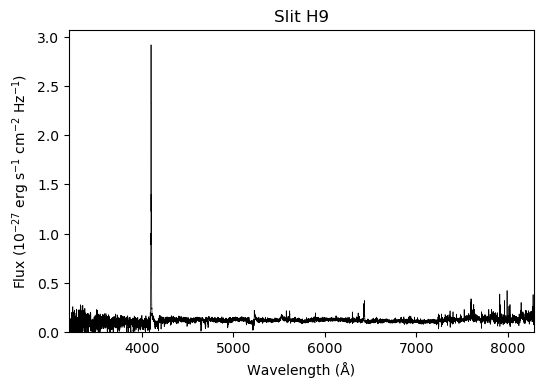

In [7]:
# Plotting moving-frame spectrum
plt.close('all')
fig,ax=plt.subplots(1,1)

plt.plot(wArr,fArr*1e27,color='black',drawstyle='steps-mid')
ax.set_xlim(wArr[0],wArr[-1])
ax.set_ylim(0.0)
plt.title('Slit H9')
ax.set_xlabel('Wavelength (Å)')
ax.set_ylabel('Flux (10$^{-27}$ erg s$^{-1}$ cm$^{-2}$ Hz$^{-1}$)')

Text(0, 0.5, 'Flux (10$^{-27}$ erg s$^{-1}$ cm$^{-2}$ Hz$^{-1}$)')

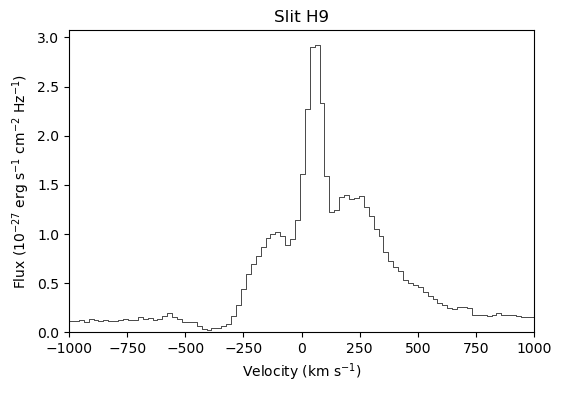

In [8]:
# Plotting the Lyα profile in its velocity space
plt.close('all')
fig,ax=plt.subplots(1,1)

plt.plot(vArr,fArr*1e27,color='black',drawstyle='steps-mid')
ax.set_xlim(-1000.0,1000.0)
ax.set_ylim(0.0)
plt.title('Slit H9')
ax.set_xlabel('Velocity (km s$^{-1}$)')
ax.set_ylabel('Flux (10$^{-27}$ erg s$^{-1}$ cm$^{-2}$ Hz$^{-1}$)')

In [9]:
popt,pcov=fitNormPeak(vArr,fArr*1e27,20.0,100.0,params=(2.8,100,20),bounds=(-np.inf,np.inf))

Text(0, 0.5, 'Flux (10$^{-27}$ erg s$^{-1}$ cm$^{-2}$ Hz$^{-1}$)')

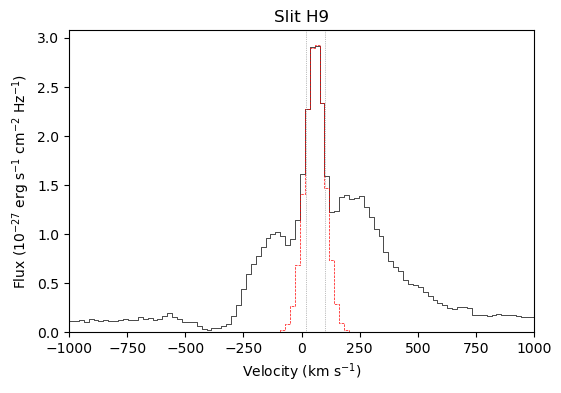

In [10]:
# Overplotting the Gaussian fit to the Lyα profile's central peak
plt.close('all')
fig,ax=plt.subplots(1,1)

plt.plot(vArr,fArr*1e27,color='black',drawstyle='steps-mid')
plt.plot(vArr,gaussFit(vArr,*popt),color='red',drawstyle='steps-mid',linestyle='dashed')
ax.axvline(20.0,color='gray',linestyle='dotted')
ax.axvline(100.0,color='gray',linestyle='dotted')
ax.set_xlim(-1000.0,1000.0)
ax.set_ylim(0.0)
plt.title('Slit H9')
ax.set_xlabel('Velocity (km s$^{-1}$)')
ax.set_ylabel('Flux (10$^{-27}$ erg s$^{-1}$ cm$^{-2}$ Hz$^{-1}$)')

Text(0, 0.5, 'Flux (10$^{-27}$ erg s$^{-1}$ cm$^{-2}$ Hz$^{-1}$)')

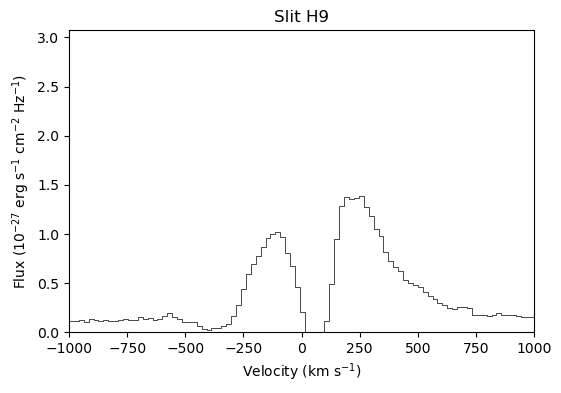

In [11]:
# Plotting the red/blueshifted peaks after subtracting the central peak's fit
plt.close('all')
fig,ax=plt.subplots(1,1)

plt.plot(vArr,fArr*1e27-gaussFit(vArr,*popt),color='black',drawstyle='steps-mid')
plt.plot(vArr,fArr*1e27,alpha=0.0,drawstyle='steps-mid')
ax.set_xlim(-1000.0,1000.0)
ax.set_ylim(0.0)
plt.title('Slit H9')
ax.set_xlabel('Velocity (km s$^{-1}$)')
ax.set_ylabel('Flux (10$^{-27}$ erg s$^{-1}$ cm$^{-2}$ Hz$^{-1}$)')

In [13]:
ctrB=centroid(vArr,fArr*1e27-gaussFit(vArr,*popt),-250.0,20.0)
print(ctrB)

-114.35528805706424


In [14]:
ctrR=centroid(vArr,fArr*1e27-gaussFit(vArr,*popt),50.0,500.0)
print(ctrR)

242.9152158616808


In [15]:
#ctr=((vArr[-1]-vArr[-2])*(centroidInd-3427.0))+vArr[3427]
#print(ctr)

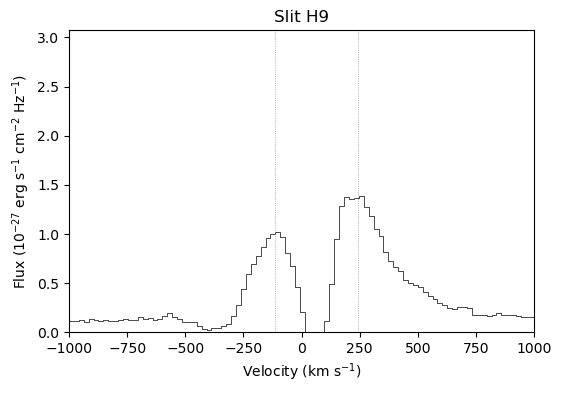

In [16]:
plt.close('all')
fig,ax=plt.subplots(1,1)

plt.plot(vArr,fArr*1e27-gaussFit(vArr,*popt),color='black',drawstyle='steps-mid')
#plt.plot(vArr,result.best_fit,color='red',drawstyle='steps-mid',linestyle='dashed')
#plt.plot(vArr,result.init_fit,c='blue',drawstyle='steps-mid',ls='dashed')
plt.plot(vArr,fArr*1e27,alpha=0.0,drawstyle='steps-mid')
ax.axvline(ctrB,c='gray',ls='dotted')
ax.axvline(ctrR,c='gray',ls='dotted')
ax.set_xlim(-1000.0,1000.0)
ax.set_ylim(0.0)
plt.title('Slit H9')
ax.set_xlabel('Velocity (km s$^{-1}$)')
ax.set_ylabel('Flux (10$^{-27}$ erg s$^{-1}$ cm$^{-2}$ Hz$^{-1}$)')

plt.savefig(figs+'/h9ctr.png',dpi=100)